# MOCS Final 
 
Random walk on relative chord's note networks based on charlie parker's solo to recreate a Parkeresque solo. 

Many aspects of physical results is hardwired into the program, but the playback of the song can is dependent on the notes that are fed. In "Parker SOlo inputting data" the model can be changed to other songs.

#### Import Libraries:

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from musicpy import *

### Reference notes and note lengths:

In [2]:
quarter_Dot = 3/8
quarter   = 1/4
eigth     = 1/8
sixteenth = 1/16 #16
triplet   = 1/12 # 12
sixteenth_Triplet = 1/24 #24

cS6 = "C#6"
e6  = "E6"
d6  = "D6"
a5 = "A5"
aS5 = "A#5"
b5 = "B5"
c5 = "C5"
cS5 = "C#5"
d5 = "D5"
dS5 = "D#5"
e5 = "E5"
f5 = "F5"
fS5 = "F#5"
g5 = "G5"
gS5 = "G#5"
a4 = "A4"
aS4 = "A#4"
b4 = "B4"
c4 = "C4"
cS4 = "C#4"
d4 = "D4"
dS4 = "D#4"
e4 = "E4"
f4 = "F4"
fS4 = "F#4"
g4 = "G4"
gS4 = "G#4"


## Parker's Solo : Inputing data
Input the notes in cronological order to for later network and playback use
Rhythms are only for playback for the moment

In [3]:
#Lick 1
bar_1_Rhythm = [eigth,quarter_Dot]
bar_1_Notes =  [c5,e5]
bar_1_Tot = chord(bar_1_Notes, interval=bar_1_Rhythm, duration=bar_1_Rhythm) | 2/4

bar_2_Rhythm = [eigth,sixteenth,sixteenth,eigth,eigth,eigth,eigth,eigth,eigth]
bar_2_Notes =  [a5,b5,a5,gS5,a5,b5,a5,fS5,e5]
bar_2_Tot = chord(bar_2_Notes, interval=bar_2_Rhythm, duration=bar_2_Rhythm)

bar_3_Rhythm = [eigth,eigth,eigth,eigth,eigth,eigth,eigth,eigth]
bar_3_Notes =  [e5,d5,cS5,a4,aS4,b4,g4,e4]
bar_3_Tot = chord(bar_3_Notes, interval=bar_3_Rhythm, duration=bar_3_Rhythm)

bar_4_Rhythm = [eigth,eigth,sixteenth,sixteenth,sixteenth,sixteenth,eigth,eigth,eigth,eigth]
bar_4_Notes =  [a4,fS4,g4,b4,d5,fS5,a5,f5,cS5,a4]
bar_4_Tot = chord(bar_4_Notes, interval=bar_4_Rhythm, duration=bar_4_Rhythm)

bar_5_Rhythm = [eigth,eigth,eigth,eigth,eigth,eigth,quarter]
bar_5_Notes =  [e5,d5,a4,b4,c5,a4,b4]
bar_5_Tot = chord(bar_5_Notes, interval=bar_5_Rhythm, duration=bar_5_Rhythm)

#Lick 2

bar_6_Rhythm = [sixteenth,sixteenth]
bar_6_Notes =  [cS5,b4]
bar_6_Tot = chord(bar_6_Notes, interval=bar_6_Rhythm, duration=bar_6_Rhythm)


bar_7_Rhythm = [eigth,eigth,eigth,eigth,eigth,eigth,eigth,eigth]
bar_7_Notes =  [gS4,a4,b4,gS4,a4,b4,cS5,d5]
bar_7_Tot = chord(bar_7_Notes, interval=bar_7_Rhythm, duration=bar_7_Rhythm)


bar_8_Rhythm = [eigth,eigth,eigth,eigth,eigth,eigth,eigth,eigth]
bar_8_Notes =  [e5,d5,cS5,b4,aS4,g5,fS5,cS5]
bar_8_Tot = chord(bar_8_Notes, interval=bar_8_Rhythm, duration=bar_8_Rhythm)


bar_9_Rhythm = [eigth,eigth,triplet,triplet,triplet,eigth,eigth]
bar_9_Notes =  [e5,d5,a4,fS4,d4,cS5,b4]
bar_9_Tot = chord(bar_9_Notes, interval=bar_9_Rhythm, duration=bar_9_Rhythm)

#Lick 3
bar_10_Rhythm = [sixteenth,sixteenth,sixteenth_Triplet,sixteenth_Triplet,sixteenth_Triplet,eigth,quarter_Dot]
bar_10_Notes =  [g5,f5,c5,a4,f4,e5,d5]
bar_10_Tot = chord(bar_10_Notes, interval=bar_10_Rhythm, duration=bar_10_Rhythm)


bar_11_Rhythm = [triplet,triplet,quarter_Dot]
bar_11_Notes =  [dS5,e5,e5]
bar_11_Tot = chord(bar_11_Notes, interval=bar_11_Rhythm, duration=bar_11_Rhythm)


bar_12_Rhythm = []
bar_12_Notes =  []
bar_12_Tot = chord(bar_12_Notes, interval=bar_12_Rhythm, duration=bar_12_Rhythm)

rest1 = 1/2 
rest2 = 7/8 

# Chorus 2
A7_C2_1  = [a5,a5,b5,a5,gS5,a5,b5,e5,gS5,g5,fS5,f5,e5,gS4,a4,d5,b4,cS5,a4]
Em7_C2_1 = [aS4,b4,g4,e4]
A7_C2_2  = [a4,gS4,fS4,e5]
D7_C2_1  = [d5,a4,b4,c5]

A7_C2_3   = [e5,f5,e5,d5,cS5,d5,e5,d5,cS5,b4]
CSm7_C2_1 = [aS4,cS5,e5,fS5]
FS7_C2_1 = [g5,a5,g5,fS5,cS5]

Bm7_C2_1  = [e5,d5,a4,fS4,d4,cS5]
E7_C2_1   = [cS5,b4,a4,gS4,b4,f4,gS4]

A7_C2_4 = [e4,d5,b4,c5]
FS7_C2_2 = [cS5,a4]

#Chorus 3
chorus_3 = [[e5,fS5,a5,c5,b5,a5,
            g5,a5,g5,e5,fS5,e5,d5,
            c5,cS5,d5,dS5,e5,d5,cS5,a4],
            [b4,a4,f5,g5,f5,dS5],
            [c5,g4,gS4,b4],
            [a4,g4,fS4,a4,e5,d5,a4,b4,c5],
            [dS5,e5,a5,cS6,e6,d6,cS6,b5],
            [aS5,cS5,e5,fS5],
            [g5,a5,g5,fS5,cS5],
            [e5,d5,cS5,a5],
            [fS5,d5,b4,fS4,a4,gS4],
            [e5,d5,cS5],
            [a4,b4,a4],
            [gS4,a4,d5],
            [f5,e5,f5,e5,d5],
            [cS5,e5]]

A7_notes = [bar_1_Notes,bar_3_Notes,[a5,f5,cS5,a4],bar_7_Notes,A7_C2_1,A7_C2_2,A7_C2_3,A7_C2_4,chorus_3[0],chorus_3[2],chorus_3[4],chorus_3[9],chorus_3[13]]


# Functions

### Function : take in array of arrays and output weighted network 

In [4]:
def matrixToNetwork(input_Array):
    #Input: matrix of various arrays  Output: Network
    #Connects the values in each respective array to its adjecent values as an edge on a network. 
    #Create Network 
    newNetwork = nx.Graph()
    for j in range(0,len(input_Array)):
        current_Array = input_Array[j]
        
        for i in range(0,len(current_Array)-1):
            #loop through array 

            if i < len(current_Array):
                #If i is not equal to the length of the array:

                current_Val = current_Array[i]   
                next_Val    = current_Array[i+1]

                if newNetwork.get_edge_data(current_Val,next_Val) == None:
                    #If there is no edge between values -> Create edge
                    newNetwork.add_edge(current_Val,next_Val,weight = 1)
                else:
                    #If there is edge between values -> Add to weight 
                    newNetwork[current_Val][next_Val]["weight"] +=   1
            
    return newNetwork

### Function: Get Notes from network. 
Input: Network of notes and Number of notes 
Output: array of notes based on network with size num_Notes

In [5]:
def getNotesUnweighted(note_Network,num_Notes):
    starting_Note = list(note_Network)[random.randint(0, len(note_Network)-1)]
    if num_Notes != 0:
        note_Array = [starting_Note]

        for j in range(0,num_Notes-1): #Loop through number of notes we want 
            current_Note = note_Array[j] # Current node is the note we chose previously
            current_Note_Dict = note_Network[current_Note]
            rand_Index = random.randint(0, len(current_Note_Dict)-1) #Get random int btw 0 - number of edges
            next_Note = list(current_Note_Dict)[rand_Index] # Edge chosen by random int

            # Append note to note_Array
            note_Array.append(next_Note)
    else:
        note_Array = []
    return note_Array

### Use weights of edges to perform weighted random walk on network


In [6]:
def getNotesWeighted(note_Network,num_Notes):
    starting_Note = list(note_Network)[random.randint(0, len(note_Network)-1)]
    note_Array = [starting_Note]
    
    for j in range(0,num_Notes-1): #Loop through number of notes we want 
        weight_Array = []
        sum_Weight = 0
        current_Note = note_Array[j] # Current node is the note we chose previously
        
        current_Note_Dict = note_Network[current_Note] # Dictionary of Edges to current note

        for current_Edge_Note in current_Note_Dict:
            
            current_Weight = current_Note_Dict[current_Edge_Note]["weight"] #Get weight of this edge
            sum_Weight += current_Weight #Sum weights 
            weight_Array.append(sum_Weight) #Append to list
            
        
        array_Weights_Sum = np.array(weight_Array) # put into numpy array for absolute
        
        random_Integer = random.randint(1,array_Weights_Sum[-1]) #Get random number between max of sum array 1 because weighting is the value between the adjacent Indexed notes
                
        difference_array = (array_Weights_Sum-random_Integer) # calculate the difference array
        abs_difference_array = np.absolute(array_Weights_Sum-random_Integer) # calculate the difference array
        
        index_Note_Chosen = (abs_difference_array.argmin()) # find the index of minimum element from the array

        if difference_array[index_Note_Chosen] < 0:
            #If the note chosen was negative we dont want this because the range of weight is the 
            #amount between the note and the next note not the previous one. 
            index_Note_Chosen = 1+index_Note_Chosen
        
        chosen_Note =list(current_Note_Dict)[index_Note_Chosen] 
                
        index_Note_Chosen = (difference_array.argmin()) # find the index of minimum element from the array

        chosen_Note =list(current_Note_Dict)[index_Note_Chosen] 
        
        note_Array.append(chosen_Note)# Append note to note_Array
    return note_Array




### Function: Get notes in the song
Input dictionary of chord networks -> Output dictionary of notes based on networks and weights

In [7]:
def getSongNotes(tune,weighted=True):
    note_Mat = []
    for current_bar in range(0,len(tune)):
#         print("***************************")
#         print("Current bar = %d, chord = %s" %(current_bar+1,tune[current_bar]))
        
        for chord_Note_Network in tune[current_bar]: # Get 

            num_Notes = getNumberNotes(current_bar,chord_Note_Network)  #Get Num notes relative to bar+Chord
            if weighted == True:
                array_Chosen_Notes = getNotesWeighted(chord_Note_Network,num_Notes)
#                 print("WEighted")
            else:
                array_Chosen_Notes = getNotesUnweighted(chord_Note_Network,num_Notes)
#                 print("UnWeighted")
            note_Mat.append(array_Chosen_Notes)
    return note_Mat

### Function: Get number of Notes 
Input: Bar number and related chord 
Output: Number of notes 

In [8]:
def getNumberNotes(bar_Number,chord):
    bar_Number +=1
    if bar_Number == 1:
        num_Notes = 2
    elif bar_Number == 2:
        num_Notes = 9
    elif bar_Number == 3:
        num_Notes = 8
    elif (bar_Number == 4 and chord == Em7_New_CP):
        num_Notes = 6
    elif (bar_Number == 4 and chord == A7_New_CP):
        num_Notes = 4
    elif bar_Number == 5:
        num_Notes = 7
    elif bar_Number == 6:
        num_Notes = 2
    elif bar_Number == 7:
        num_Notes = 8
    elif (bar_Number == 8  and chord == CSm7_New_CP):
        num_Notes = 4
    elif (bar_Number == 8  and chord == FS7_New_CP):
        num_Notes = 4
    elif bar_Number == 9:
        num_Notes = 7
    elif bar_Number == 10:
        num_Notes = 7
    elif (bar_Number == 11 and chord == A7_New_CP):
        num_Notes = 0
    elif (bar_Number == 11 and chord == FS7_New_CP):
        num_Notes = 3
    elif (bar_Number == 12 and chord == Bm7_New_CP):
        num_Notes = 0
    elif (bar_Number == 12 and chord == E7_New_CP):
        num_Notes = 3
    else:
        print("Error in getNumberNotes()------------------- ")
    return num_Notes

### Func for Histograms

In [9]:
def getHistogramsSingle(noteMat,save=False):
    chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
    for i in range(0,len(noteMat)):
#         print(chordNames[i])
        fig, ax = plt.subplots(figsize =(10, 7))
        
        ax.hist(noteMat[i])
        if save == True:
            plt.savefig(str(chordNames[i] + "Histogram"))  
        
        x = [c4,cS4,d4,dS4,e4,f4,fS4,g4,gS4,a4,aS4,b4,c5,cS5,d5,dS5,e5,f5,fS5,g5,gS5,a5]
        
        default_x_ticks = range(len(x))
        plt.xlabel("Notes")
        plt.xticks(default_x_ticks,x)
        plt.ylabel("Frequency")
        plt.title(chordNames[i])
        plt.show()

In [10]:

def getNetowrkAnalysis(network):
    print("Number of Nodes : ",network.number_of_nodes())
    print("Number of Edges : ",network.number_of_edges())
    print("Density : ", nx.density(network))
    print("degree : ",nx.degree(network))
    print("Centrality : ",nx.degree_centrality(network))
    print("Betweenness Centrality : ",nx.betweenness_centrality(network))

### Playing Charlie Parker's Solo

In [11]:
A7_New_CP   = matrixToNetwork(A7_notes)
D7_New_CP   = matrixToNetwork([bar_2_Notes,bar_5_Notes,D7_C2_1,chorus_3[3]])
Em7_New_CP  = matrixToNetwork([[a4,fS4,g4,b4,d5,fS5],Em7_C2_1,chorus_3[1]])
CSm7_New_CP = matrixToNetwork([[e5,d5,cS5,b4],CSm7_C2_1,chorus_3[5]])
FS7_New_CP  = matrixToNetwork([[aS4,g5,fS5,cS5],bar_11_Notes,FS7_C2_1,FS7_C2_2,chorus_3[6]])
Bm7_New_CP  = matrixToNetwork([bar_9_Notes,Bm7_C2_1,chorus_3[7]])
E7_New_CP   = matrixToNetwork([bar_10_Notes,bar_12_Notes,E7_C2_1,chorus_3[8],chorus_3[12]])


# ParkerNetowrks = [A7_New_CP,D7_New_CP,Em7_New_CP,CSm7_New_CP,FS7_New_CP,E7_New_CP,Bm7_New_CP]
# for i in range(0,len(ParkerNetowrks)):
#     chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
#     print(chordNames[i])
#     getNetowrkAnalysis(ParkerNetowrks[i])

In [12]:
transpose = -9 # move it into the key charlie played for playing since 
Perhaps_Charlie  = track( bar_1_Tot +transpose|1/2| bar_2_Tot +transpose| bar_3_Tot+transpose | bar_4_Tot+transpose | 
                          bar_5_Tot+transpose |7/8| bar_6_Tot+transpose | bar_7_Tot+transpose | bar_8_Tot+transpose | 
                          bar_9_Tot+transpose | 1/2 | bar_10_Tot+transpose |rest1| bar_11_Tot+transpose | bar_12_Tot+transpose ,             
      instrument=65, 
      start_time=0,  
      channel=15,  
      track_name=None,
      pan=None,       
      volume=None, 
      bpm=210,
      name=None,
      sampler_channel=1)

play(Perhaps_Charlie) 


## View the Input Note Networks each a different chord from His solo

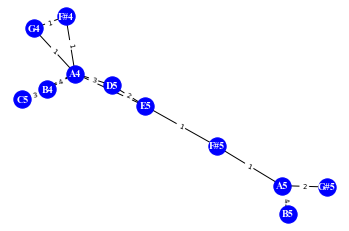

In [13]:
current_Network = D7_New_CP
pos=nx.spring_layout(current_Network)
pos=nx.rescale_layout_dict(pos,2)
weight = nx.get_edge_attributes(current_Network, "weight")

nx.draw_networkx_edge_labels(current_Network, pos, weight,font_size=7)
nx.draw(current_Network,pos=pos,with_labels=True,
        node_color="blue",node_size=300,
        font_color="white",font_size=10,font_family="Times New Roman", font_weight="bold",
        width=1)
plt.savefig('A7.pdf')

## Main Loops

Initialize the Tune's Chords as dict. Each arry in dict is one measure/bar.

Loop through the bars in the tune from 0 to 11 (12 bars in tune):
    loop through chords in each bar
        Get number of notes for that chord 
        Get note network for that chord 
        Perform random walk on note network to get array of notes 
        Append note array to matrix

Leave with matrix of notes with index corresponding to the chords in the tune.

## Weighted Model

In [14]:
tune = [[A7_New_CP],
        [D7_New_CP],
        [A7_New_CP],
        [Em7_New_CP,A7_New_CP],
        [D7_New_CP],
        [D7_New_CP],
        [A7_New_CP],
        [CSm7_New_CP,FS7_New_CP],
        [Bm7_New_CP],
        [E7_New_CP],
        [A7_New_CP,FS7_New_CP],
        [Bm7_New_CP,E7_New_CP]]
note_Mat_Model = getSongNotes(tune)

### Play Notes Found at Tempo 

In [15]:
from musicpy import *
bar4 = note_Mat_Model[3] + note_Mat_Model[4]
bar8 = note_Mat_Model[8] + note_Mat_Model[9]
bar6 = note_Mat_Model[13] + note_Mat_Model[14]

transpose = -9

bar_1_Tot    = chord(note_Mat_Model[0], interval=bar_1_Rhythm, duration=bar_1_Rhythm) +transpose
bar_2_Tot    = chord(note_Mat_Model[1], interval=bar_2_Rhythm, duration=bar_2_Rhythm) +transpose
bar_3_Tot    = chord(note_Mat_Model[2], interval=bar_3_Rhythm, duration=bar_3_Rhythm) +transpose
bar_4_Tot    = chord(bar4, interval=bar_4_Rhythm, duration=bar_4_Rhythm) +transpose
bar_5_Tot    = chord(note_Mat_Model[5], interval=bar_5_Rhythm, duration=bar_5_Rhythm) +transpose
bar_6_Tot    = chord(note_Mat_Model[6], interval=bar_6_Rhythm, duration=bar_6_Rhythm) +transpose
bar_7_Tot    = chord(note_Mat_Model[7], interval=bar_7_Rhythm, duration=bar_7_Rhythm)+transpose
bar_8_Tot    = chord(bar8, interval=bar_8_Rhythm, duration=bar_8_Rhythm) +transpose
bar_9_Tot    = chord(note_Mat_Model[10], interval=bar_9_Rhythm, duration=bar_9_Rhythm) +transpose
bar_10_Tot    = chord(note_Mat_Model[11], interval=bar_10_Rhythm, duration=bar_10_Rhythm) +transpose
bar_11_Tot    = chord(note_Mat_Model[13], interval=bar_11_Rhythm, duration=bar_11_Rhythm) +transpose
# bar_12_Tot    = chord([], interval=bar_12_Rhythm, duration=bar_12_Rhythm) | 2/4

solo         =   (bar_1_Tot |rest1 | bar_2_Tot | bar_3_Tot | bar_4_Tot |  
                  bar_5_Tot |rest2| bar_6_Tot  | bar_7_Tot| bar_8_Tot | 
                  bar_9_Tot |rest1| bar_10_Tot | rest1 | bar_11_Tot)

Perhaps_Sim  =  track(solo ,             
      instrument=65, 
      start_time=0,  
      channel=1,  
      track_name=None,
      pan=None,       
      volume=None, 
      bpm=210,
      name=None,
      sampler_channel=1)

play(Perhaps_Sim) 

## Note Analysis

### Histograms for Parker's Solo

In [16]:

#Not elegant
A7_CP_Notes = (['C5', 'E5', 'E5', 'D5', 'C#5', 'A4', 'A#4', 'B4', 'G4', 'E4', 'A5', 'F5', 'C#5', 'A4', 'G#4', 'A4', 'B4', 'G#4', 'A4', 'B4', 'C#5', 'D5', 'A5', 'A5', 'B5', 'A5', 'G#5', 'A5', 'B5', 'E5', 'G#5', 'G5', 'F#5', 'F5', 'E5', 'G#4', 'A4', 'D5', 'B4', 'C#5', 'A4', 'A4', 'G#4', 'F#4', 'E5', 'E5', 'F5', 'E5', 'D5', 'C#5', 'D5', 'E5', 'D5', 'C#5', 'B4', 'E4', 'D5', 'B4', 'C5', 'E5', 'F#5', 'A5', 'C5', 'B5', 'A5', 'G5', 'A5', 'G5', 'E5', 'F#5', 'E5', 'D5', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'D5', 'C#5', 'A4', 'C5', 'G4', 'G#4', 'B4', 'D#5', 'E5', 'A5', 'C#6', 'E6', 'D6', 'C#6', 'B5', 'E5', 'D5', 'C#5', 'C#5', 'E5'])

D7_CP_Notes = ['A5', 'B5', 'A5', 'G#5', 'A5', 'B5', 'A5', 'F#5', 'E5', 'E5', 'D5', 'A4', 'B4', 'C5', 'A4', 'B4', 'D5', 'A4', 'B4', 'C5', 'A4', 'G4', 'F#4', 'A4', 'E5', 'D5', 'A4', 'B4', 'C5']

Em7_CP_Notes =['A4', 'F#4', 'G4', 'B4', 'D5', 'F#5', 'A#4', 'B4', 'G4', 'E4', 'B4', 'A4', 'F5', 'G5', 'F5', 'D#5']
CSm7_CP_Notes = ['E5', 'D5', 'C#5', 'B4','A#4', 'C#5', 'E5', 'F#5','A#5', 'C#5', 'E5', 'F#5']
FS7_CP_Notes = ['A#4', 'G5', 'F#5', 'C#5','D#5', 'E5', 'E5','G5', 'A5', 'G5', 'F#5', 'C#5','C#5', 'A4','G5', 'A5', 'G5', 'F#5', 'C#5']
Bm7_CP_Notes = ['E5', 'D5', 'A4', 'F#4', 'D4', 'C#5', 'B4','E5', 'D5', 'A4', 'F#4', 'D4', 'C#5','E5', 'D5', 'C#5', 'A5']
E7_CP_Notes = ['G5', 'F5', 'C5', 'A4', 'F4', 'E5', 'D5','C#5', 'B4', 'A4', 'G#4', 'B4', 'F4', 'G#4','F#5', 'D5', 'B4', 'F#4', 'A4', 'G#4','F5', 'E5', 'F5', 'E5', 'D5']
all_CP_Notes = [A7_CP_Notes,D7_CP_Notes,Em7_CP_Notes,CSm7_CP_Notes,FS7_CP_Notes,Bm7_CP_Notes,E7_CP_Notes]
# getHistogramsSingle(all_CP_Notes,save=False)


## Histograms for Model's Solo

In [17]:

note_Mat_Models   = [getSongNotes(tune),getSongNotes(tune),getSongNotes(tune)]
A7_Notes_Model   =[]
D7_Notes_Model   =[]
Em7_Notes_Model  =[]
CSm7_Notes_Model =[]
FS7_Notes_Model  =[]
Bm7_Notes_Model  =[]
E7_Notes_Model   =[]
counter = 0
for note_Mat_Model in note_Mat_Models:
    if counter ==0:
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[1]+note_Mat_Model[5]+note_Mat_Model[6]
    else: 
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[1]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[5]+note_Mat_Model[6]
        
    Em7_Notes_Model  += note_Mat_Model[3]
    CSm7_Notes_Model += note_Mat_Model[8]
    FS7_Notes_Model  += note_Mat_Model[9]+note_Mat_Model[13]
    Bm7_Notes_Model  += note_Mat_Model[10]+note_Mat_Model[14]
    E7_Notes_Model   += note_Mat_Model[11]+note_Mat_Model[15]
    counter+=1
    
# print(A7_Notes1)
# note_Mat_Model = getSongNotes(tune)
# A7_Notes_Model   = joinAllArrays(joinAllArrays(joinAllArrays(joinAllArrays(note_Mat_Model[0],note_Mat_Model[2]),note_Mat_Model[4]),note_Mat_Model[7]),note_Mat_Model[12])
# D7_Notes_Model  = joinAllArrays(joinAllArrays(note_Mat_Model[1],note_Mat_Model[5]),note_Mat_Model[6])
# Em7_Notes_Model  = note_Mat_Model[3]
# CSm7_Notes_Model = note_Mat_Model[8]
# FS7_Notes_Model  = joinAllArrays(note_Mat_Model[9],note_Mat_Model[13])
# Bm7_Notes_Model  = joinAllArrays(note_Mat_Model[10], note_Mat_Model[14])
# E7_Notes_Model  = joinAllArrays(note_Mat_Model[11],note_Mat_Model[15])
# print(A7_Notes1)



In [18]:
note_Mat_Model_Weighted = [A7_Notes_Model,D7_Notes_Model,Em7_Notes_Model,CSm7_Notes_Model,FS7_Notes_Model,Bm7_Notes_Model,E7_Notes_Model]
# getHistograms(noteMatNew)


In [19]:
def getHistograms(noteMat_CP,noteMat_Model,save=False,Weighted=True):
    chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
    for i in range(0,len(noteMat_CP)):
        plt.figure(figsize =(10, 7))
        
#         if i == 0:
#             x = [c4,cS4,d4,dS4,e4,f4,fS4,g4,gS4,a4,aS4,b4,c5,cS5,d5,dS5,e5,f5,fS5,g5,gS5]
            
#         else:
#             x = [c4,cS4,d4,dS4,e4,f4,fS4,g4,gS4,a4]
        x = [d4,e4,f4,fS4,g4,gS4,a4,aS4,b4,c5,cS5,d5,dS5,e5,f5,fS5,g5,gS5,a5,aS5,b5,cS6,d6,e6]#,b5,c6,cS6,d6,dS6,e6
        y_CP = np.zeros(len(x))
        y_Model = np.zeros(len(x))
        for j in range(0,len(x)):
#             print("Current note = ", x[j])
#             print("Count for CP",noteMat_CP[i].count(x[j]))
            y_CP[j] = noteMat_CP[i].count(x[j])
            y_Model[j] = noteMat_Model[i].count(x[j])
            
            
#         print(y_CP)
#         print(y_Model)
        
        
        bins = np.arange(len(x)+1) - 0.5
#         print(noteMat_CP[i])
        plt.hist(x,bins, weights=y_CP, alpha = 0.75, label= "Parker's Notes",color = 'b')
        plt.hist(x,bins, weights=y_Model, alpha = 0.75, label= "Model's Notes",color = 'g')
        
#         plt.hist(y_Model,bins, alpha = 0.75, label= "Model's Notes",color = 'b')
#         plt.hist(y_CP,bins, alpha = 0.75, label= "Parker's Notes",color = 'g')
        
#         print("Current Notes = ",noteMat_Model[i])
        plt.legend(loc="upper right")
#         print(x)
        default_x_ticks = range(len(x))
#         print(default_x_ticks)
        plt.xlabel("Notes")
        plt.xticks(default_x_ticks,x)
        plt.ylabel("Frequency")
        plt.title(chordNames[i])
        if save == True:
            if Weighted == True:
                plt.savefig("Histograms/"+str(chordNames[i] + "WRW_Histogram")) 
            else:
                plt.savefig("Histograms/"+str(chordNames[i] + "UWRW_Histogram"))  
                
        plt.show()


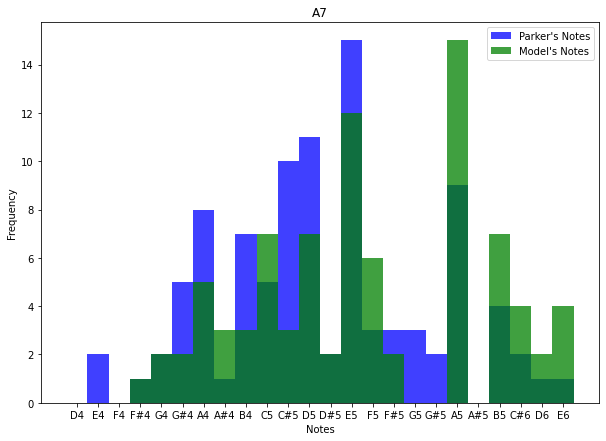

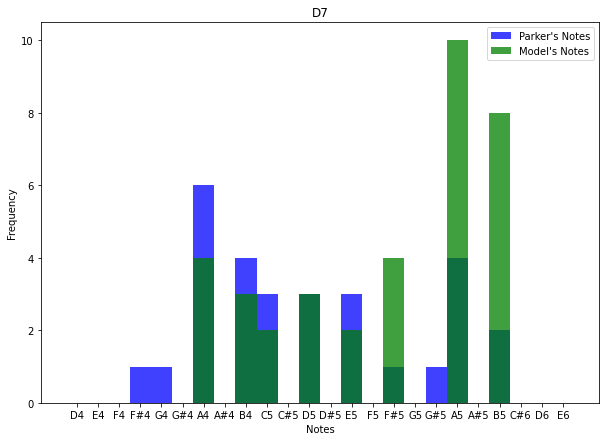

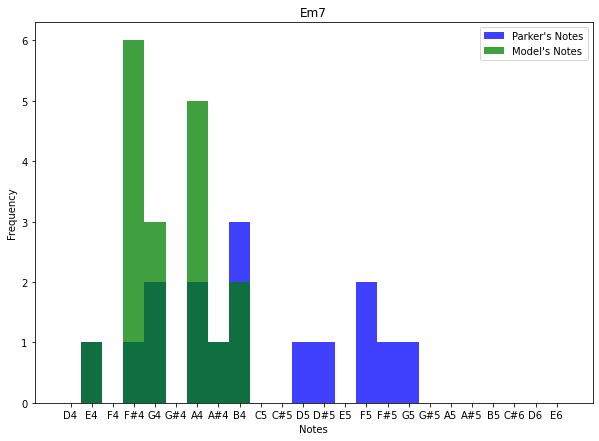

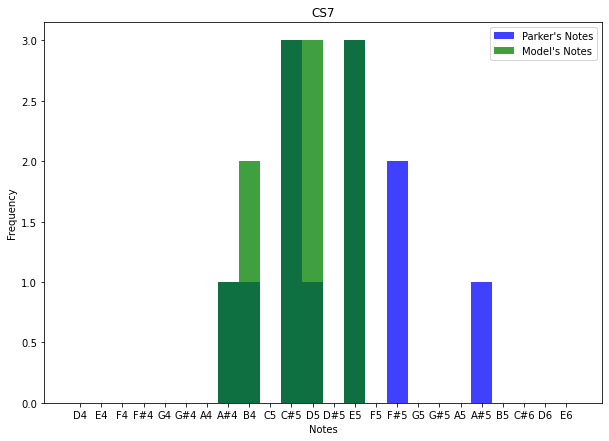

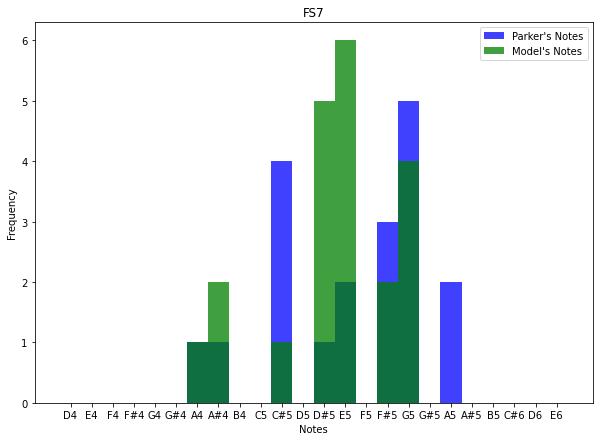

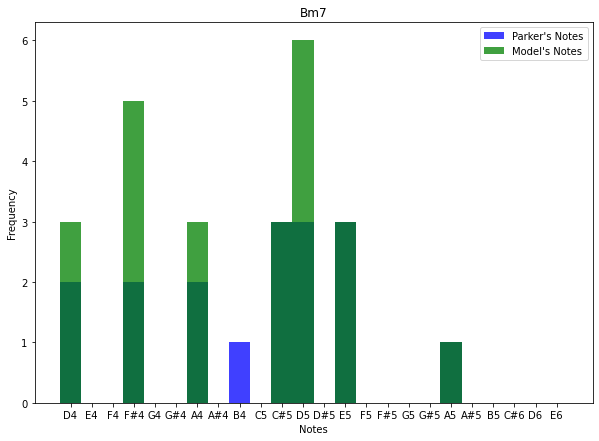

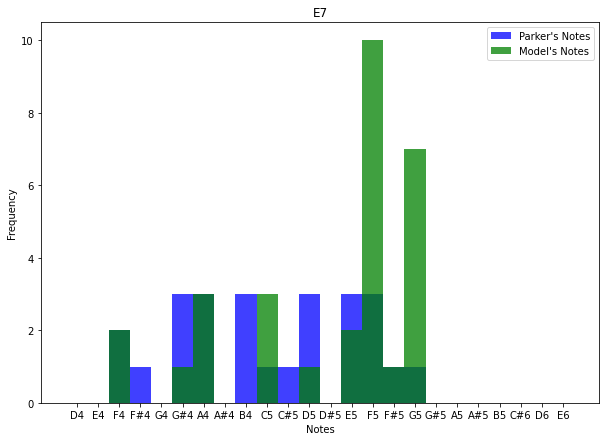

In [20]:
getHistograms(all_CP_Notes,note_Mat_Model_Weighted,save=True,Weighted = True)

## Get Networks From Model

In [21]:

A7_Mat_Model   =[]
D7_Mat_Model   =[]
Em7_Mat_Model =[]
CSm7_Mat_Model =[]
FS7_Mat_Model  =[]
Bm7_Mat_Model  =[]
E7_Mat_Model   =[]
chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
counter = 0
for note_Mat_Model in note_Mat_Models:
    if counter == 0:
        A7_Mat_Model   += [note_Mat_Model[0],note_Mat_Model[2],note_Mat_Model[4],note_Mat_Model[7],note_Mat_Model[12]]
        D7_Mat_Model   += [note_Mat_Model[1],note_Mat_Model[5],note_Mat_Model[6]]
    else: 
        A7_Mat_Model   += [note_Mat_Model[0],note_Mat_Model[1],note_Mat_Model[2],note_Mat_Model[4],note_Mat_Model[7],note_Mat_Model[12]]
        D7_Mat_Model   += [note_Mat_Model[5],note_Mat_Model[6]]
    counter+=1
    Em7_Mat_Model  += [note_Mat_Model[3]]
    CSm7_Mat_Model += [note_Mat_Model[8]]
    FS7_Mat_Model  += [note_Mat_Model[9],note_Mat_Model[13]]
    Bm7_Mat_Model  += [note_Mat_Model[10],note_Mat_Model[14]]
    E7_Mat_Model   += [note_Mat_Model[11],note_Mat_Model[15]]

    
matrix_of_notes = [A7_Mat_Model   ,D7_Mat_Model   ,Em7_Mat_Model  ,CSm7_Mat_Model ,FS7_Mat_Model  ,Bm7_Mat_Model  , E7_Mat_Model ] 
# for i in range(0,len(matrix_of_notes)):
#     print(chordNames[i])
#     current_Network = matrixToNetwork(matrix_of_notes[i])
# #     pos=nx.spring_layout(current_Network)
# #     pos=nx.rescale_layout_dict(pos,2)
# #     weight = nx.get_edge_attributes(current_Network, "weight")
# #     nx.draw_networkx_edge_labels(current_Network, pos, weight,font_size=7)
# #     nx.draw(current_Network,pos=pos,with_labels=True,
# #             node_color="blue",node_size=300,
# #             font_color="white",font_size=10,font_family="Times New Roman", font_weight="bold",
# #             width=1)
    
# #     plt.savefig("Networks/"+str(chordNames[i] + "WeightedRWNetwork_Model.pdf"))  
# #     plt.margins(0.05)
# #     plt.show()
    
#     getNetowrkAnalysis(current_Network)



## Unweighted Random Walk Model

### Main Loops

Initialize the Tune's Chords as dict. Each arry in dict is one measure/bar.

Loop through the bars in the tune from 0 to 11 (12 bars in tune):
    loop through chords in each bar
        Get number of notes for that chord 
        Get note network for that chord 
        Perform random walk on note network to get array of notes 
        Append note array to matrix

Leave with matrix of notes with index corresponding to the chords in the tune.

In [22]:
tune = [[A7_New_CP],
        [D7_New_CP],
        [A7_New_CP],
        [Em7_New_CP,A7_New_CP],
        [D7_New_CP],
        [D7_New_CP],
        [A7_New_CP],
        [CSm7_New_CP,FS7_New_CP],
        [Bm7_New_CP],
        [E7_New_CP],
        [A7_New_CP,FS7_New_CP],
        [Bm7_New_CP,E7_New_CP]]
note_Mat_Model = getSongNotes(tune,weighted=False)

### Play Notes Found at Tempo 

In [23]:
from musicpy import *
bar4 = note_Mat_Model[3] + note_Mat_Model[4]
bar8 = note_Mat_Model[8] + note_Mat_Model[9]
bar6 = note_Mat_Model[13] + note_Mat_Model[14]

transpose = -9

bar_1_Tot    = chord(note_Mat_Model[0], interval=bar_1_Rhythm, duration=bar_1_Rhythm) +transpose
bar_2_Tot    = chord(note_Mat_Model[1], interval=bar_2_Rhythm, duration=bar_2_Rhythm) +transpose
bar_3_Tot    = chord(note_Mat_Model[2], interval=bar_3_Rhythm, duration=bar_3_Rhythm) +transpose
bar_4_Tot    = chord(bar4, interval=bar_4_Rhythm, duration=bar_4_Rhythm) +transpose
bar_5_Tot    = chord(note_Mat_Model[5], interval=bar_5_Rhythm, duration=bar_5_Rhythm) +transpose
bar_6_Tot    = chord(note_Mat_Model[6], interval=bar_6_Rhythm, duration=bar_6_Rhythm) +transpose
bar_7_Tot    = chord(note_Mat_Model[7], interval=bar_7_Rhythm, duration=bar_7_Rhythm)+transpose
bar_8_Tot    = chord(bar8, interval=bar_8_Rhythm, duration=bar_8_Rhythm) +transpose
bar_9_Tot    = chord(note_Mat_Model[10], interval=bar_9_Rhythm, duration=bar_9_Rhythm) +transpose
bar_10_Tot    = chord(note_Mat_Model[11], interval=bar_10_Rhythm, duration=bar_10_Rhythm) +transpose
bar_11_Tot    = chord(note_Mat_Model[13], interval=bar_11_Rhythm, duration=bar_11_Rhythm) +transpose
# bar_12_Tot    = chord([], interval=bar_12_Rhythm, duration=bar_12_Rhythm) | 2/4

solo         =   (bar_1_Tot |rest1 | bar_2_Tot | bar_3_Tot | bar_4_Tot |  
                  bar_5_Tot |rest2| bar_6_Tot  | bar_7_Tot| bar_8_Tot | 
                  bar_9_Tot |rest1| bar_10_Tot | rest1 | bar_11_Tot)

Perhaps_Sim  =  track(solo ,             
      instrument=65, 
      start_time=0,  
      channel=1,  
      track_name=None,
      pan=None,       
      volume=None, 
      bpm=210,
      name=None,
      sampler_channel=1)

play(Perhaps_Sim) 



## Histograms for Model's Solo

In [24]:

note_Mat_Models  = [getSongNotes(tune,weighted = False),getSongNotes(tune,weighted = False),getSongNotes(tune,weighted = False)]
A7_Notes_Model   =[]
D7_Notes_Model   =[]
Em7_Notes_Model  =[]
CSm7_Notes_Model =[]
FS7_Notes_Model  =[]
Bm7_Notes_Model  =[]
E7_Notes_Model   =[]
counter = 0
for note_Mat_Model in note_Mat_Models:
    if counter == 0:
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[1]+note_Mat_Model[5]+note_Mat_Model[6]
    else: 
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[1]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[5]+note_Mat_Model[6]
    
    Em7_Notes_Model  += note_Mat_Model[3]
    CSm7_Notes_Model += note_Mat_Model[8]
    FS7_Notes_Model  += note_Mat_Model[9]+note_Mat_Model[13]
    Bm7_Notes_Model  += note_Mat_Model[10]+note_Mat_Model[14]
    E7_Notes_Model   += note_Mat_Model[11]+note_Mat_Model[15]
    counter+=1


In [25]:
noteMat_Model = [A7_Notes_Model,D7_Notes_Model,Em7_Notes_Model,CSm7_Notes_Model,FS7_Notes_Model,Bm7_Notes_Model,E7_Notes_Model]
# getHistograms(noteMatNew)


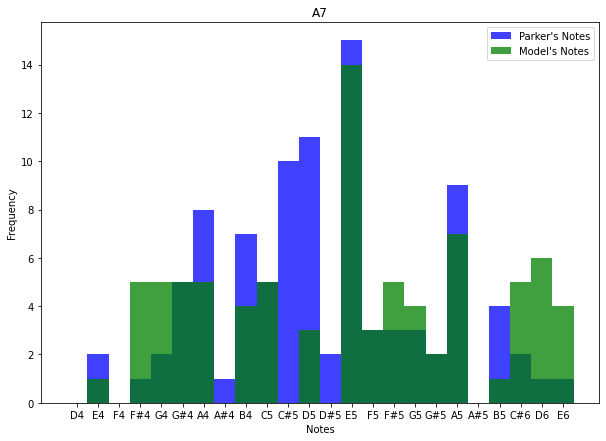

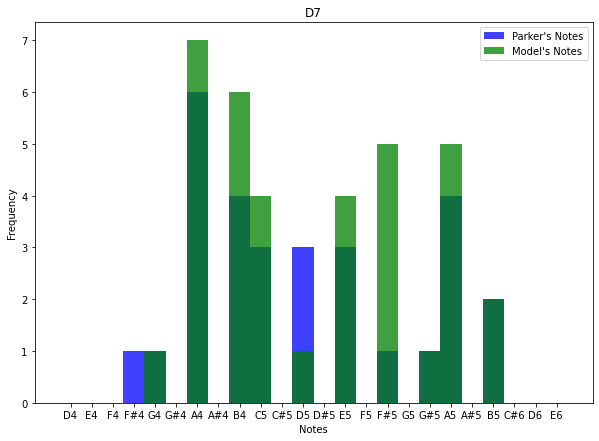

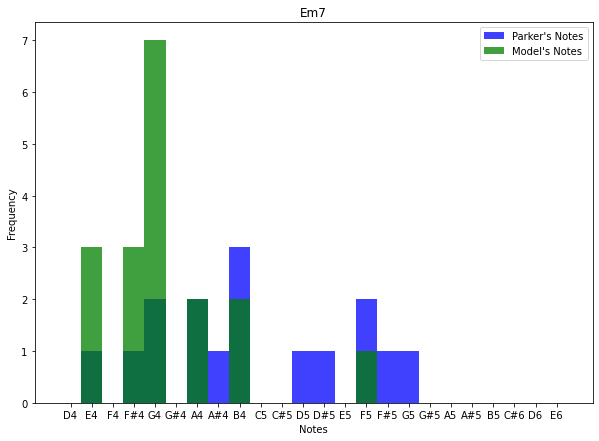

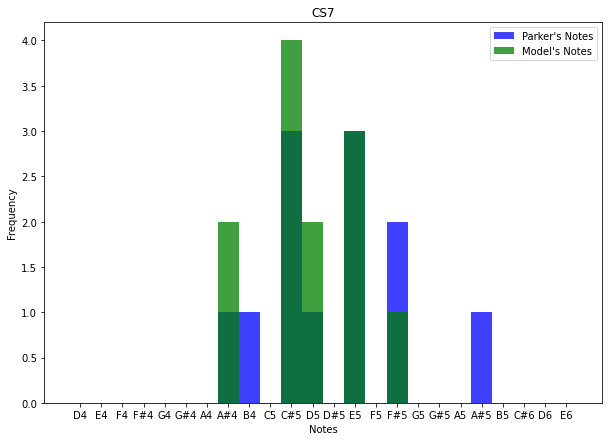

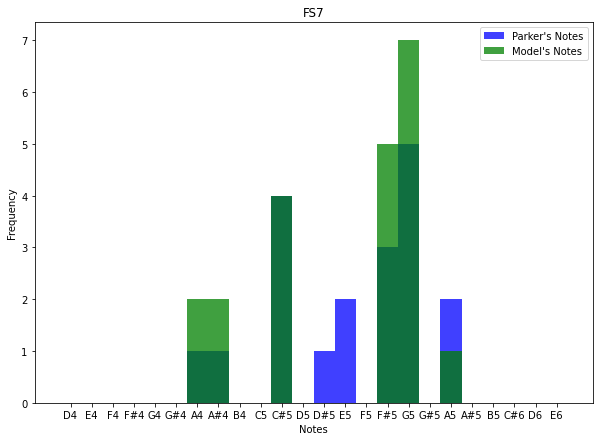

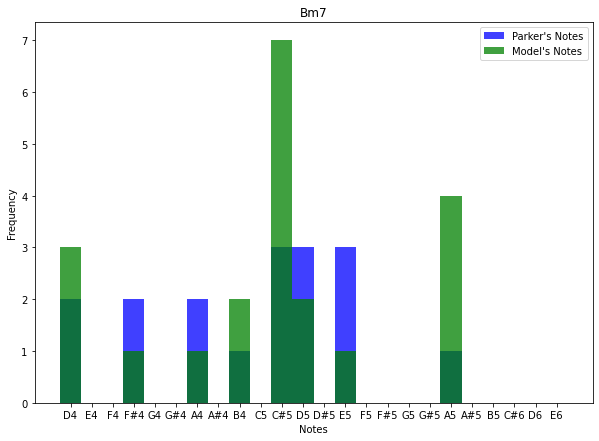

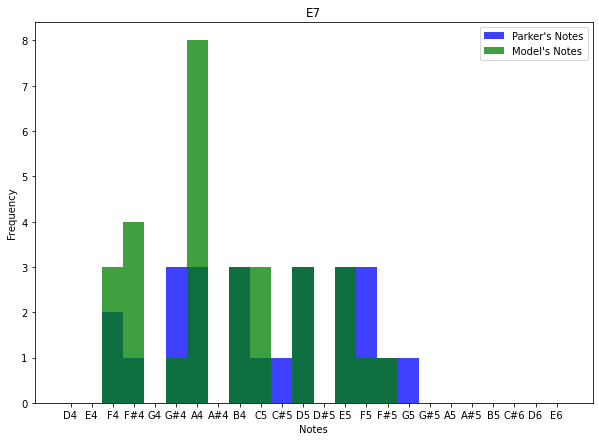

In [26]:
getHistograms(all_CP_Notes,noteMat_Model,save=True,Weighted = False)


## Get Networks From Model

A7


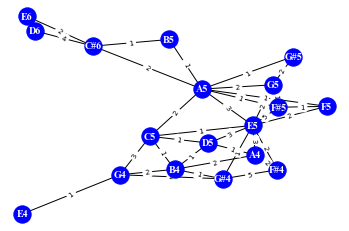

D7


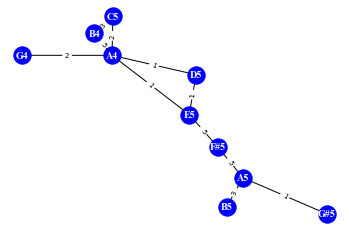

Em7


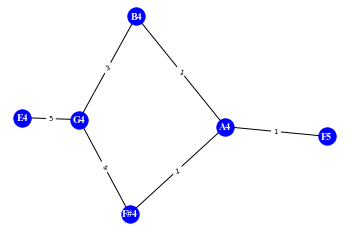

CS7


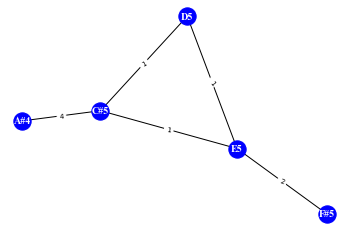

FS7


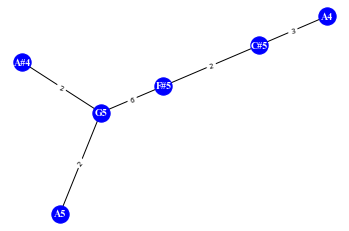

Bm7


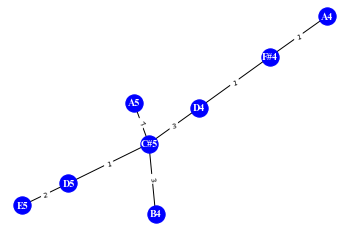

E7


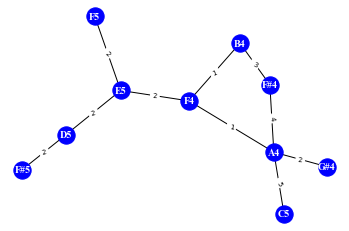

In [27]:

A7_Mat_Model   =[]
D7_Mat_Model   =[]
Em7_Mat_Model  =[]
CSm7_Mat_Model =[]
FS7_Mat_Model  =[]
Bm7_Mat_Model  =[]
E7_Mat_Model   =[]
chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
counter = 0 
for note_Mat_Model in note_Mat_Models:
    if counter == 0:
        A7_Mat_Model   += [note_Mat_Model[0],note_Mat_Model[2],note_Mat_Model[4],note_Mat_Model[7],note_Mat_Model[12]]
        D7_Mat_Model   += [note_Mat_Model[1],note_Mat_Model[5],note_Mat_Model[6]]
    else: 
        A7_Mat_Model   += [note_Mat_Model[0],note_Mat_Model[1],note_Mat_Model[2],note_Mat_Model[4],note_Mat_Model[7],note_Mat_Model[12]]
        D7_Mat_Model   += [note_Mat_Model[5],note_Mat_Model[6]]
    Em7_Mat_Model  += [note_Mat_Model[3]]
    CSm7_Mat_Model += [note_Mat_Model[8]]
    FS7_Mat_Model  += [note_Mat_Model[9],note_Mat_Model[13]]
    Bm7_Mat_Model  += [note_Mat_Model[10],note_Mat_Model[14]]
    E7_Mat_Model   += [note_Mat_Model[11],note_Mat_Model[15]]
    counter += 1

matrix_of_notes = [A7_Mat_Model   ,D7_Mat_Model   ,Em7_Mat_Model  ,CSm7_Mat_Model ,FS7_Mat_Model  ,Bm7_Mat_Model  , E7_Mat_Model ] 
for i in range(0,len(matrix_of_notes)):
    print(chordNames[i])
    current_Network = matrixToNetwork(matrix_of_notes[i])
    pos=nx.spring_layout(current_Network)
    pos=nx.rescale_layout_dict(pos,2)
    weight = nx.get_edge_attributes(current_Network, "weight")
    nx.draw_networkx_edge_labels(current_Network, pos, weight,font_size=7)
    nx.draw(current_Network,pos=pos,with_labels=True,
            node_color="blue",node_size=300,
            font_color="white",font_size=10,font_family="Times New Roman", font_weight="bold",
            width=1)
    
    plt.savefig("Networks/"+str(chordNames[i] + "UnweightedRWNetwork_Model.pdf"))  
    plt.margins(0.05)
    plt.show()
    

In [28]:

# for i in range(0,len(matrix_of_notes)):
#     print(chordNames[i])
#     current_Network = matrixToNetwork(matrix_of_notes[i])
#     getNetowrkAnalysis(current_Network)

## Stochastic Model

In [29]:
def getNotesStochasticModel(note_Network,num_Notes):
    starting_Note = list(note_Network)[random.randint(0, len(note_Network)-1)]
    note_Array = [starting_Note]
    j=0
    currentNum = num_Notes + 1
    while currentNum > 1: #Loop through number of notes we want 
        weight_Array = []
        sum_Weight = 0
        current_Note = note_Array[j] # Current node is the note we chose previously
        
        current_Note_Dict = note_Network[current_Note] # Dictionary of Edges to current note

        for current_Edge_Note in current_Note_Dict:
            
            current_Weight = current_Note_Dict[current_Edge_Note]["weight"] #Get weight of this edge
            sum_Weight += current_Weight #Sum weights 
            weight_Array.append(sum_Weight) #Append to list
            
        
        array_Weights_Sum = np.array(weight_Array) # put into numpy array for absolute
        
        random_Integer = random.randint(1,array_Weights_Sum[-1]) #Get random number between max of sum array 1 because weighting is the value between the adjacent Indexed notes
                
        difference_array = (array_Weights_Sum-random_Integer) # calculate the difference array
        abs_difference_array = np.absolute(array_Weights_Sum-random_Integer) # calculate the difference array
        
        index_Note_Chosen = (abs_difference_array.argmin()) # find the index of minimum element from the array

        if difference_array[index_Note_Chosen] < 0:
            #If the note chosen was negative we dont want this because the range of weight is the 
            #amount between the note and the next note not the previous one. 
            index_Note_Chosen = 1+index_Note_Chosen
        
        chosen_Note =list(current_Note_Dict)[index_Note_Chosen] 
                
        index_Note_Chosen = (difference_array.argmin()) # find the index of minimum element from the array

        chosen_Note =list(current_Note_Dict)[index_Note_Chosen] 
        
        note_Array.append(chosen_Note)# Append note to note_Array
        currentNum = random.randint(1,num_Notes)
        j+=1
#         print("j =", j)
#         print("Current Num = ",currentNum)
#         print("NumNotes =", num_Notes)
    return note_Array




In [30]:
def getSongNotes_Stoc(tune,weighted=True):
    note_Mat = []
    for current_bar in range(0,len(tune)):
#         print("***************************")
#         print("Current bar = %d, chord = %s" %(current_bar+1,tune[current_bar]))
        
        for chord_Note_Network in tune[current_bar]: # Get 

            num_Notes = getNumberNotes(current_bar,chord_Note_Network)  #Get Num notes relative to bar+Chord
            if weighted == True:
                array_Chosen_Notes = getNotesStochasticModel(chord_Note_Network,num_Notes)
            else:
                array_Chosen_Notes = getNotesStochasticModel(chord_Note_Network,num_Notes)
            note_Mat.append(array_Chosen_Notes)
            
    return note_Mat

In [31]:

note_Mat_Models   = [getSongNotes_Stoc(tune),getSongNotes_Stoc(tune),getSongNotes_Stoc(tune)]
A7_Notes_Model   =[]
D7_Notes_Model   =[]
Em7_Notes_Model  =[]
CSm7_Notes_Model =[]
FS7_Notes_Model  =[]
Bm7_Notes_Model  =[]
E7_Notes_Model   =[]
counter = 0
for note_Mat_Model in note_Mat_Models:
    if counter ==0:
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[1]+note_Mat_Model[5]+note_Mat_Model[6]
    else: 
        A7_Notes_Model   += note_Mat_Model[0]+note_Mat_Model[1]+note_Mat_Model[2]+note_Mat_Model[4]+note_Mat_Model[7]+note_Mat_Model[12]
        D7_Notes_Model   += note_Mat_Model[5]+note_Mat_Model[6]
        
    Em7_Notes_Model  += note_Mat_Model[3]
    CSm7_Notes_Model += note_Mat_Model[8]
    FS7_Notes_Model  += note_Mat_Model[9]+note_Mat_Model[13]
    Bm7_Notes_Model  += note_Mat_Model[10]+note_Mat_Model[14]
    E7_Notes_Model   += note_Mat_Model[11]+note_Mat_Model[15]
    counter+=1
    

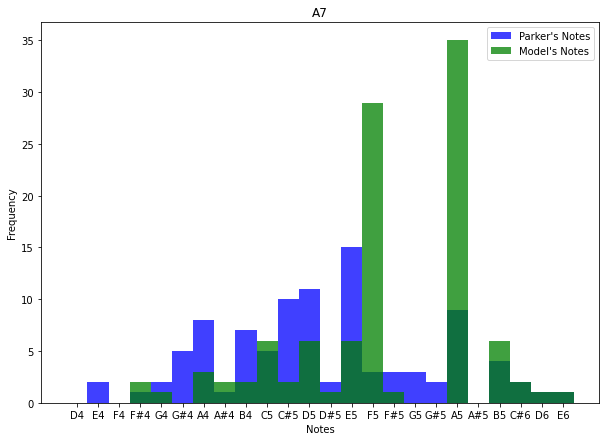

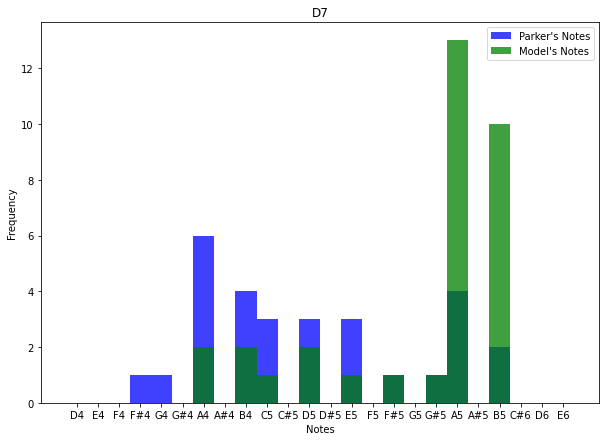

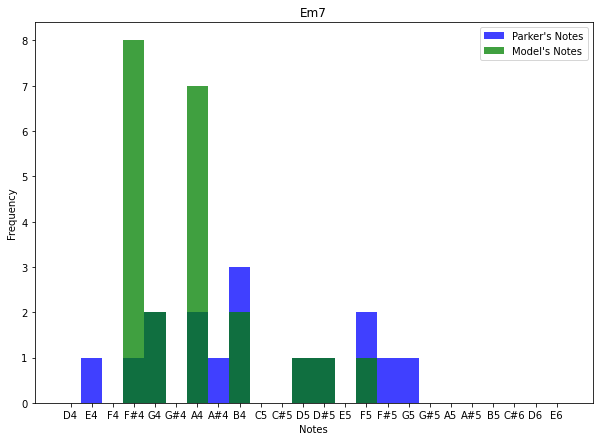

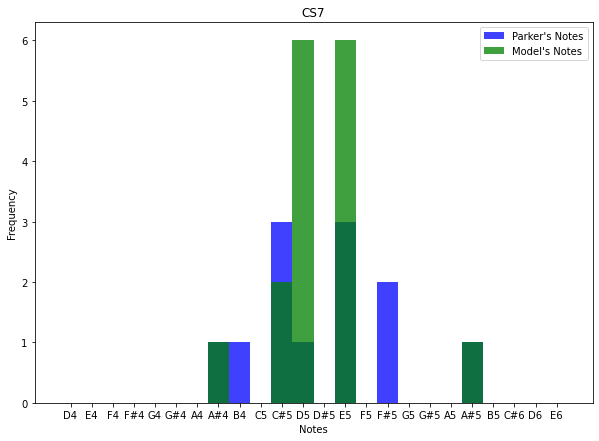

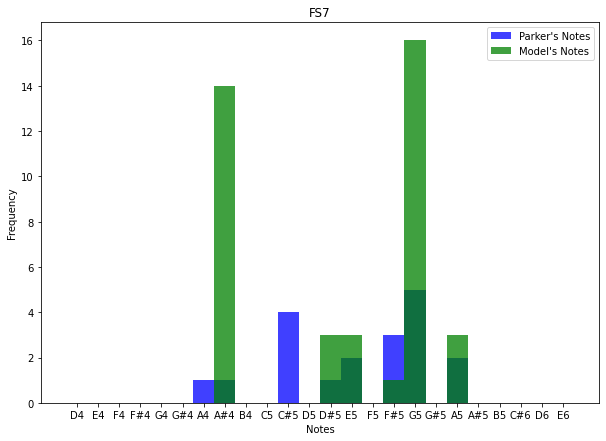

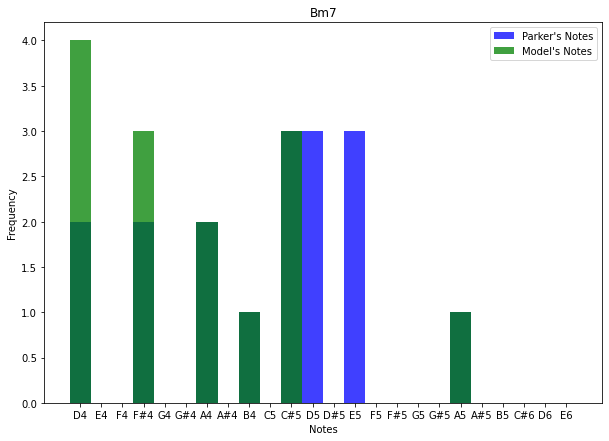

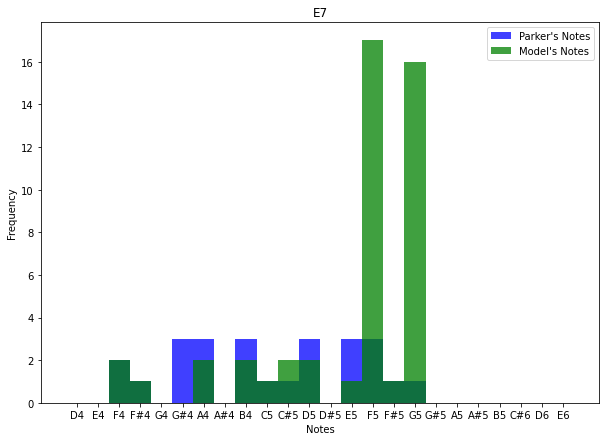

In [32]:
def getHistogramsStoc(noteMat_CP,noteMat_Model,save=False,Weighted=True):
    chordNames = ["A7","D7","Em7","CS7","FS7","Bm7","E7"]
    for i in range(0,len(noteMat_CP)):
        plt.figure(figsize =(10, 7))
        
#         if i == 0:
#             x = [c4,cS4,d4,dS4,e4,f4,fS4,g4,gS4,a4,aS4,b4,c5,cS5,d5,dS5,e5,f5,fS5,g5,gS5]
            
#         else:
#             x = [c4,cS4,d4,dS4,e4,f4,fS4,g4,gS4,a4]
        x = [d4,e4,f4,fS4,g4,gS4,a4,aS4,b4,c5,cS5,d5,dS5,e5,f5,fS5,g5,gS5,a5,aS5,b5,cS6,d6,e6]#,b5,c6,cS6,d6,dS6,e6
        y_CP = np.zeros(len(x))
        y_Model = np.zeros(len(x))
        for j in range(0,len(x)):
#             print("Current note = ", x[j])
#             print("Count for CP",noteMat_CP[i].count(x[j]))
            y_CP[j] = noteMat_CP[i].count(x[j])
            y_Model[j] = noteMat_Model[i].count(x[j])
            
            
#         print(y_CP)
#         print(y_Model)
        
        
        bins = np.arange(len(x)+1) - 0.5
#         print(noteMat_CP[i])
        plt.hist(x,bins, weights=y_CP, alpha = 0.75, label= "Parker's Notes",color = 'b')
        plt.hist(x,bins, weights=y_Model, alpha = 0.75, label= "Model's Notes",color = 'g')
        
#         plt.hist(y_Model,bins, alpha = 0.75, label= "Model's Notes",color = 'b')
#         plt.hist(y_CP,bins, alpha = 0.75, label= "Parker's Notes",color = 'g')
        
#         print("Current Notes = ",noteMat_Model[i])
        plt.legend(loc="upper right")
#         print(x)
        default_x_ticks = range(len(x))
#         print(default_x_ticks)
        plt.xlabel("Notes")
        plt.xticks(default_x_ticks,x)
        plt.ylabel("Frequency")
        plt.title(chordNames[i])
        if save == True:
            if Weighted == True:
                plt.savefig("Histograms/"+str(chordNames[i] + "stoc_Hist")) 
            else:
                plt.savefig("Histograms/"+str(chordNames[i] + "UWRW_Histogram"))  
                
        plt.show()

noteMat_Model_Stoc = [A7_Notes_Model,D7_Notes_Model,Em7_Notes_Model,CSm7_Notes_Model,FS7_Notes_Model,Bm7_Notes_Model,E7_Notes_Model]
# getHistograms(noteMatNew)
getHistogramsStoc(all_CP_Notes,noteMat_Model_Stoc,save=True)
